#### Dependencies

In [1050]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

#### Import dataset

In [1051]:
bcdata = pd.read_csv('/Users/bbaidya/class/breast-cancer-wisconsin.data', names=['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape','marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','target_class'])

#### Verify data

In [1052]:
bcdata.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,target_class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [1053]:
bcdata.shape

(699, 11)

In [1054]:
bcdata.target_class.unique()

array([2, 4])

In [1055]:
bcdata.target_class.value_counts(dropna=False)

2    458
4    241
Name: target_class, dtype: int64

In [1056]:
bcdata.clump_thickness.unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

In [1057]:
bcdata.clump_thickness.value_counts(dropna=False)

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64

In [1058]:
bcdata.uniformity_of_cell_size.unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9])

In [1059]:
bcdata.uniformity_of_cell_size.value_counts(dropna=False)

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniformity_of_cell_size, dtype: int64

In [1060]:
bcdata.uniformity_of_cell_shape.unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9])

In [1061]:
bcdata.uniformity_of_cell_shape.value_counts(dropna=False)

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: uniformity_of_cell_shape, dtype: int64

In [1062]:
bcdata.marginal_adhesion.unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7])

In [1063]:
bcdata.marginal_adhesion.value_counts(dropna=False)

1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64

In [1064]:
bcdata.single_epithelial_cell_size.unique()

array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9])

In [1065]:
bcdata.single_epithelial_cell_size.value_counts(dropna=False)

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_epithelial_cell_size, dtype: int64

In [1066]:
bcdata.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [1067]:
bcdata.bare_nuclei.value_counts(dropna=False)

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [1068]:
bcdata.loc[(bcdata.bare_nuclei == '?'),'bare_nuclei']='1'

In [1069]:
bcdata.bare_nuclei.value_counts(dropna=False)

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [1070]:
bcdata['bare_nuclei'] = bcdata['bare_nuclei'].astype(str).astype(int)

In [1071]:
bcdata.bare_nuclei.unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [1072]:
bcdata.bland_chromatin.unique()

array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10])

In [1073]:
bcdata.bland_chromatin.value_counts(dropna=False)

2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64

In [1074]:
bcdata.normal_nucleoli.unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8])

In [1075]:
bcdata.normal_nucleoli.value_counts(dropna=False)

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: normal_nucleoli, dtype: int64

In [1076]:
bcdata.mitoses.unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6])

In [1077]:
bcdata.mitoses.value_counts(dropna=False)

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

#### Correlation between featues

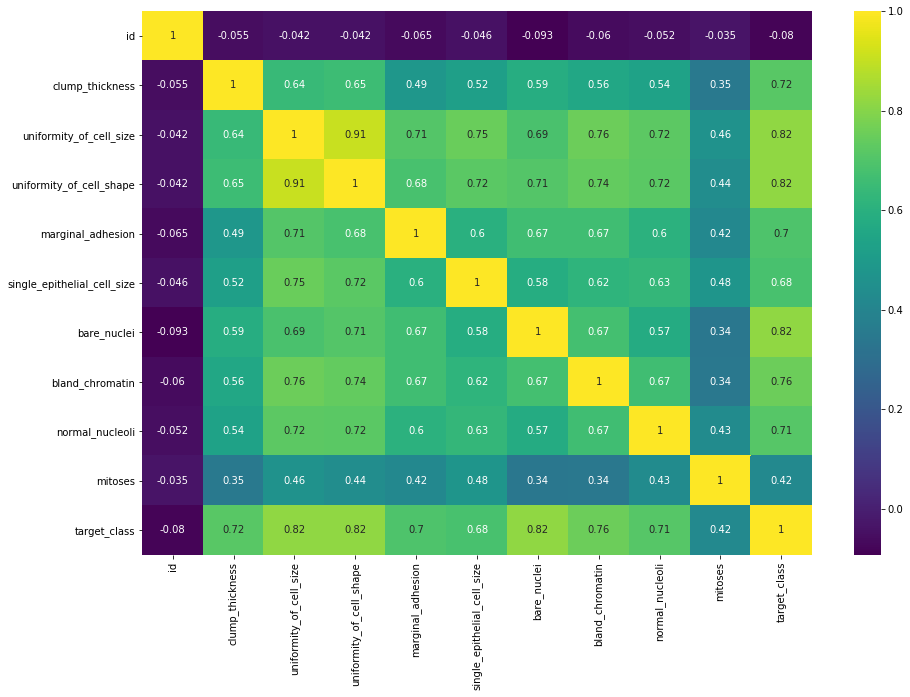

In [1078]:
plt.figure(figsize=(15, 10))
sns.heatmap(bcdata.corr(), annot=True, cmap='viridis')

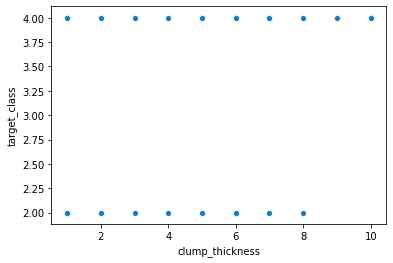

In [1101]:
sns.scatterplot(x='clump_thickness',y="target_class", data=bcdata)

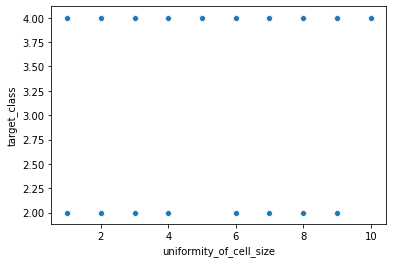

In [1102]:
sns.scatterplot(x='uniformity_of_cell_size',y="target_class", data=bcdata)

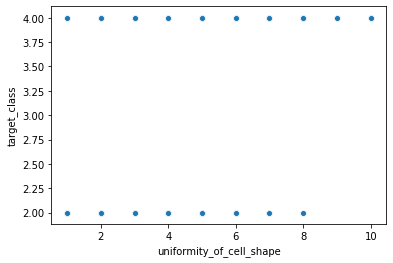

In [1103]:
sns.scatterplot(x='uniformity_of_cell_shape',y="target_class", data=bcdata)

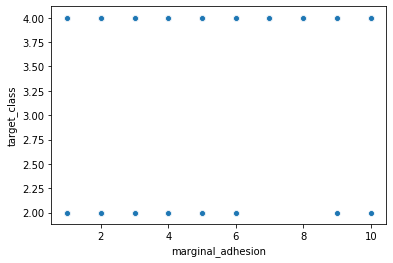

In [1104]:
sns.scatterplot(x='marginal_adhesion',y="target_class", data=bcdata)

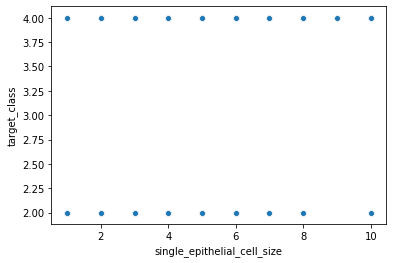

In [1105]:
sns.scatterplot(x='single_epithelial_cell_size',y="target_class", data=bcdata)

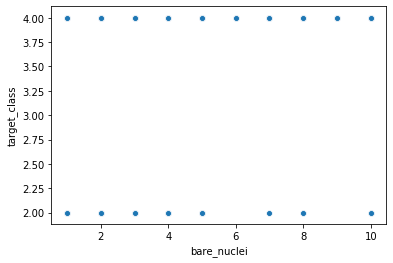

In [1106]:
sns.scatterplot(x='bare_nuclei',y="target_class", data=bcdata)

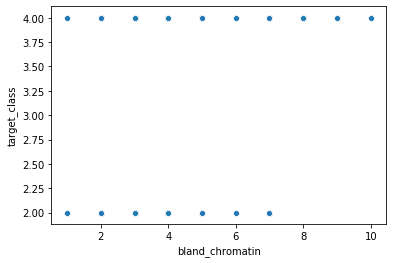

In [1107]:
sns.scatterplot(x='bland_chromatin',y="target_class", data=bcdata)

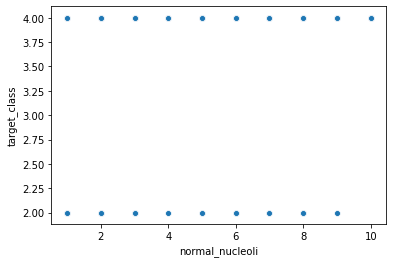

In [1108]:
sns.scatterplot(x='normal_nucleoli',y="target_class", data=bcdata)

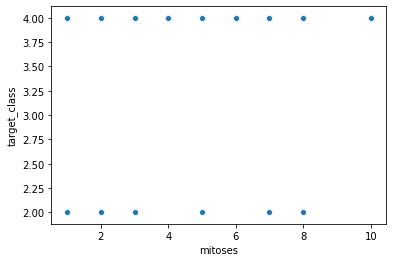

In [1109]:
sns.scatterplot(x='mitoses',y="target_class", data=bcdata)

#### Split dataset (Test,Train split)

In [1081]:
bcdata = bcdata.drop('id', axis=1)
X = bcdata.drop('target_class', axis=1).values
y = bcdata['target_class'].values

In [1082]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1083]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear SVM

In [1084]:
classifier = SVC(random_state=0, kernel='linear')
#classifier = svm.LinearSVC()

In [1085]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [1086]:
y_pred = classifier.predict(X_test)

##### 2.a Performance measures for Linear SVM

In [1087]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129   6]
 [  4  71]]


In [1088]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,2,4,All
True,,,
2,129,6,135
4,4,71,75
All,133,77,210


In [1089]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       135
           4       0.92      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [1090]:
svm_report=classification_report(y_test, y_pred,output_dict=True)

#### Linear SVM contributing features

['clump_thickness' 'uniformity_of_cell_size' 'uniformity_of_cell_shape'
 'marginal_adhesion' 'single_epithelial_cell_size' 'bare_nuclei'
 'bland_chromatin' 'normal_nucleoli' 'mitoses']


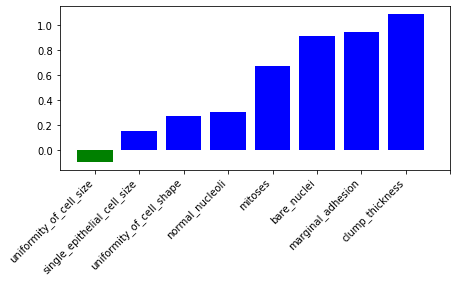

In [1091]:
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(7, 3))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(bcdata.drop(['target_class'], axis = 1).columns.values)
feature_plot(classifier, bcdata.drop(['target_class'], axis = 1).columns.values)

#### Polynomial SVM

In [1092]:
polysvm = SVC(gamma='scale', kernel='poly', degree=3)

In [1093]:
polysvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1094]:
polysvm_y_pred = polysvm.predict(X_test)

##### 2.b Performance measures for polynomial SVM

In [1095]:
pd.crosstab(y_test, polysvm_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,2,4,All
True,,,
2,130,5,135
4,7,68,75
All,137,73,210


In [1096]:
print(classification_report(y_test, polysvm_y_pred))

              precision    recall  f1-score   support

           2       0.95      0.96      0.96       135
           4       0.93      0.91      0.92        75

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



In [1097]:
psvm_report=classification_report(y_test, polysvm_y_pred,output_dict=True)

In [1098]:
#macro_precision =  psvm_report['macro avg']['precision'] 
#macro_recall = psvm_report['macro avg']['recall']    
#macro_f1 = psvm_report['macro avg']['f1-score']
#accuracy = psvm_report['accuracy']
#print(accuracy)

##### 2.c Bar plot for Linear and Polynomial SVM performance measures

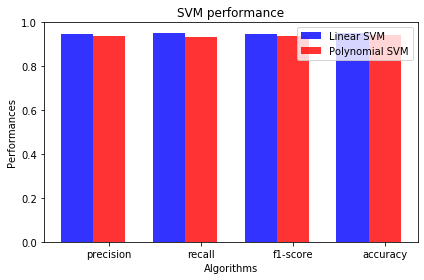

In [1099]:
# data to plot
n_groups = 4
means_frank = (svm_report['macro avg']['precision'], svm_report['macro avg']['recall'], svm_report['macro avg']['f1-score'], svm_report['accuracy'])
means_guido = (psvm_report['macro avg']['precision'], psvm_report['macro avg']['recall'], psvm_report['macro avg']['f1-score'], psvm_report['accuracy'])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Linear SVM')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Polynomial SVM')

plt.xlabel('Algorithms')
plt.ylabel('Performances')
plt.title('SVM performance')
plt.xticks(index + bar_width, ('precision', 'recall', 'f1-score', 'accuracy'))
plt.legend()

plt.tight_layout()
plt.show()